**Email:** Lawal1998@yahoo.com  <br />
**ID:** 726832020

# User Analytics in Telecommunication Industry

In this project, as the lead Data Scientist for Mr. Gates Venture Capitalist Enterprise, I would be during an indepth analysis of the financial records of a company, TellCo, my boss has his eyes on. The overall objective is to make a recommendation as to whether it is profitable to invest in the company or not. To do this, I will be using a four-thronged inquiry approach, which are:
 * Understanding the user overview analysis
 * User engagement analysis
 * User experience analysis
 * User satisfaction analysis
I will do this analysis sequentially any my dataset can be found [here](https://drive.google.com/file/d/1OanjZw9oVT6n73q-ZyU0CJn6SGYBuZhp/view?usp=sharing) and the column meaning is stored [here](https://docs.google.com/spreadsheets/d/1_SZmLrmE7CodG52bkNlExLgrlXuH2TJ8Pb7zC0tpDYE/edit#gid=784155610)


In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import *
from tabulate import tabulate

In [2]:
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = (9,5)
sns.set()

## User Overview Analysis

In this section, I will be seeking to understand the dataset, identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. It suggests the next logical steps, questions, or areas of research for this project.

In [3]:
#reading in the dataset

df = pd.read_excel('Week2_challenge_data_source.xlsx')

In [4]:
df.head()   #previewing the dataset

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
df.columns    #viewing the column names

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
Bearer Id                                   150001 non-null object
Start                                       150000 non-null datetime64[ns]
Start ms                                    150000 non-null float64
End                                         150000 non-null datetime64[ns]
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null f

In [7]:
#dealing with null values as indicated above
df.fillna(df.mean(), inplace=True)

In [8]:
df.shape

(150001, 55)

In [9]:
df.describe()     #identifying Outliers

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,4625.340082,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [10]:
#knowing the unique handset types in the dataframe and thier counts

handset = df['Handset Type'].value_counts()

In [11]:
handset.head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [12]:
#seeing that one of the values is "undefined", we will replace it with the next most used 

top_10_handset = handset.head(11).drop('undefined')
top_10_handset

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

In [13]:
#determining the top three handset manufacturer

top_3_manufacturer = df['Handset Manufacturer'].value_counts().head(3)
top_3_manufacturer

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [14]:
#Identifying the top 5 handsets per manufacturer
top_manufacturers = ['Apple', 'Samsung', 'Huawei']

def top_5(manufacturer):
    manufacturer_handset = {}
    for i in df.index:
        if df['Handset Manufacturer'][i]==manufacturer:
            if df['Handset Type'][i] in manufacturer_handset:
                manufacturer_handset[df['Handset Type'][i]] += 1
            else:
                manufacturer_handset[df['Handset Type'][i]] = 1
    return sorted(manufacturer_handset.items(), key=lambda x: x[1], reverse=True)[:5]

In [15]:
for manufacturer in top_manufacturers:
    print('The top five handset for {} are:'.format(manufacturer))
    for index in top_5(manufacturer):
        print(index[0])
    print('\n')

The top five handset for Apple are:
Apple iPhone 6S (A1688)
Apple iPhone 6 (A1586)
Apple iPhone 7 (A1778)
Apple iPhone Se (A1723)
Apple iPhone 8 (A1905)


The top five handset for Samsung are:
Samsung Galaxy S8 (Sm-G950F)
Samsung Galaxy A5 Sm-A520F
Samsung Galaxy J5 (Sm-J530)
Samsung Galaxy J3 (Sm-J330)
Samsung Galaxy S7 (Sm-G930X)


The top five handset for Huawei are:
Huawei B528S-23A
Huawei E5180
Huawei P20 Lite Huawei Nova 3E
Huawei P20
Huawei Y6 2018




**Recommendation for Marketing**

From the analyses I did above, I found that the top three brands TellCo Users use are:
* Apple
* Samsung
* Huawei

Also, I got the top five phones per each branch in the cell above. Therefore, it would dwell well for the company if the marketing strategy is such that it reaches more users of those three brands or more specifically the top five handsets.
I have two propositions to make on how this information can be used to improve the reach and impact of marketing:
* A targeted ads for the users of those brands and top handsets
* Collaboration with manufacturer of the top phones to drive more sales at in the Republic of Pefkakia

### Aggregating By Users

In telecommunication, CDR or Call Detail Record is the voice channel. XDR is the data channel. So here, consider xDR as data sessions Detail Record. In xDR, user behavior can be tracked through the following applications:  Social Media, Google, Email, Youtube, Netflix, Gaming, Other. And Mr. Gates wants to have an overview of the users’ behavior on those applications to inform his investing decision.

Therefore, I will be aggregating per user the following information in the column:
* number of xDR sessions
* Session duration
* the total download (DL) and upload (UL) data
* the total data volume (in Bytes) during this session for each application

In [16]:
# Each user has a unique MSISDN
df['MSISDN/Number'].nunique()

106857

There is a 150001 row hence there are cases where one user has more than one session or perhaps some null values.

In [17]:
# Aggreagating number of xDR sessions

# number_session = {}
# for i in df.index:
#         if df['MSISDN/Number'][i] in number_session:
#             number_session[df['MSISDN/Number'][i]] += 1
#         else:
#             number_session[df['MSISDN/Number'][i]] = 1

#another more efficient route 
number_session = df.groupby('MSISDN/Number')['MSISDN/Number'].count()

In [18]:
sorted(number_session.items(), key=lambda x: x[1], reverse=True)[:10]     #top 10 users as regards number of sessions

[(41882819545.02736, 1066),
 (33626320676.0, 18),
 (33614892860.0, 17),
 (33625779332.0, 17),
 (33659725664.0, 16),
 (33675877202.0, 15),
 (33760536639.0, 15),
 (33667163239.0, 13),
 (33603127838.0, 12),
 (33604515716.0, 12)]

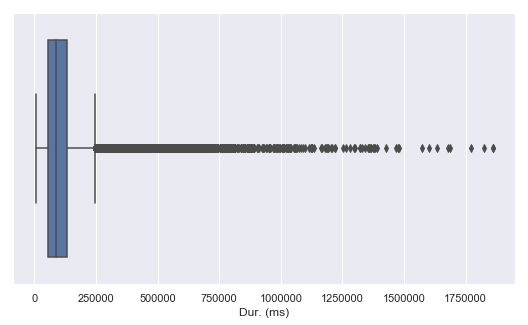

In [19]:
#showing with outliers

sns.boxplot(x=df['Dur. (ms)'])    #understandable because users have varying duration they use 

In [20]:
# Aggreagating duration of sessions per user

session_duration = df.groupby('MSISDN/Number')['Dur. (ms).1'].sum()

In [21]:
sorted(session_duration.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards duration of sessions

[(41882819545.02736, 72551547092.54602),
 (33625779332.0, 18553763486.0),
 (33614892860.0, 9966905758.0),
 (33760536639.0, 9279442000.0),
 (33626320676.0, 8791936680.0),
 (33667163239.0, 8744922020.0),
 (33662840755.0, 6614274287.0),
 (33664693736.0, 6288735771.0),
 (33603127838.0, 6287767483.0),
 (33667456716.0, 5649885358.0)]

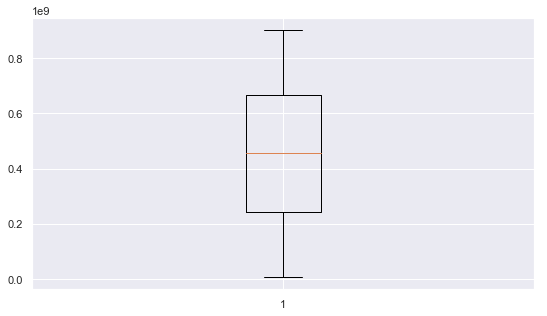

In [22]:
#showing with outliers

plt.boxplot(df['Total DL (Bytes)'])     
plt.show()     #no outliers

In [23]:
#Aggregating using total download data(DL)

total_download = df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()

In [24]:
sorted(total_download.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total download data

[(41882819545.02736, 487378285756.079),
 (33614892860.0, 8156743493.0),
 (33760536639.0, 7811295382.0),
 (33625779332.0, 7770043342.0),
 (33675877202.0, 7309541816.0),
 (33626320676.0, 7301516540.0),
 (33659725664.0, 7081602462.0),
 (33666464084.0, 6903439962.0),
 (33760413819.0, 6610851624.0),
 (33664712899.0, 6400773755.0)]

C:\Users\OWNER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


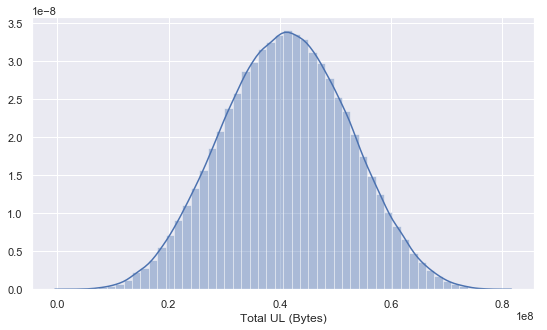

In [25]:
sns.distplot(df['Total UL (Bytes)'])    #perfectly shaped, no outlier

In [26]:
#Aggregating using total upload data(UL)

total_upload = df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()

In [27]:
sorted(total_upload.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total upload data

[(41882819545.02736, 44366423488.29211),
 (33625779332.0, 729577380.0),
 (33760536639.0, 703478581.0),
 (33614892860.0, 689483001.0),
 (33626320676.0, 669650721.0),
 (33659725664.0, 624260321.0),
 (33675877202.0, 581568792.0),
 (33667163239.0, 566326364.0),
 (33698792269.0, 530343105.0),
 (33760413819.0, 521518890.0)]

 **Aggregating for each user application: Social Media, Youtube, Netflix, Google, Email, Gaming, Others**

In [28]:
#Aggregating using total social media data volume

df['total_sm'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
total_sm = df.groupby('MSISDN/Number')['total_sm'].sum()

In [29]:
sorted(total_sm.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total social media data

[(41882819545.02736, 1973817362.2080266),
 (33626320676.0, 43374779.0),
 (33760536639.0, 39783189.0),
 (33659725664.0, 35412358.0),
 (33614892860.0, 28294544.0),
 (33625779332.0, 27135500.0),
 (33667163239.0, 24247850.0),
 (33786323068.0, 23974919.0),
 (33669068942.0, 23800834.0),
 (33603127838.0, 23077825.0)]

In [30]:
#Aggregating using total Youtube data volume

df['total_youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
total_youtube = df.groupby('MSISDN/Number')['total_youtube'].sum()

In [31]:
sorted(total_youtube.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total youtube data

[(41882819545.02736, 24340725905.6386),
 (33625779332.0, 452958769.0),
 (33760536639.0, 396289198.0),
 (33614892860.0, 394370218.0),
 (33626320676.0, 374483047.0),
 (33675877202.0, 317410572.0),
 (33667163239.0, 315231310.0),
 (33627080969.0, 308790774.0),
 (33760413819.0, 303169107.0),
 (33698792269.0, 302661958.0)]

In [32]:
#Aggregating using total Netflix data volume

df['total_netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
total_netflix = df.groupby('MSISDN/Number')['total_netflix'].sum()

In [33]:
sorted(total_netflix.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total netflix data

[(41882819545.02736, 24253572125.53838),
 (33659725664.0, 399519079.0),
 (33614892860.0, 361401046.0),
 (33625779332.0, 356980607.0),
 (33760536639.0, 334643269.0),
 (33626320676.0, 328725740.0),
 (33760413819.0, 318347546.0),
 (33667163239.0, 313939488.0),
 (33675877202.0, 309093159.0),
 (33786323068.0, 305939790.0)]

In [34]:
#Aggregating using total Google data volume

df['total_google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
total_google = df.groupby('MSISDN/Number')['total_google'].sum()

In [35]:
sorted(total_google.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total google data

[(41882819545.02736, 8248576910.545573),
 (33626320676.0, 152191852.0),
 (33625779332.0, 142307915.0),
 (33614892860.0, 127973787.0),
 (33760536639.0, 123223099.0),
 (33659725664.0, 116516345.0),
 (33786323068.0, 110254484.0),
 (33675877202.0, 109860502.0),
 (33667163239.0, 105032696.0),
 (33761268199.0, 97089988.0)]

In [36]:
#Aggregating using total Email data volume

df['total_email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
total_email = df.groupby('MSISDN/Number')['total_email'].sum()

In [37]:
sorted(total_email.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total email data

[(41882819545.02736, 2399880433.30996),
 (33626320676.0, 42418782.0),
 (33614892860.0, 40788634.0),
 (33625779332.0, 40633966.0),
 (33786323068.0, 36310123.0),
 (33659725664.0, 35999792.0),
 (33760536639.0, 33693767.0),
 (33675877202.0, 31514421.0),
 (33665460546.0, 30417885.0),
 (33667163239.0, 30335796.0)]

In [38]:
#Aggregating using total Gaming data volume

df['total_gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
total_gaming = df.groupby('MSISDN/Number')['total_gaming'].sum()

In [39]:
sorted(total_gaming.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total gaming data

[(41882819545.02736, 461478029804.7061),
 (33614892860.0, 7749432234.0),
 (33760536639.0, 7461045228.0),
 (33625779332.0, 7326673487.0),
 (33675877202.0, 6970567597.0),
 (33626320676.0, 6887572116.0),
 (33659725664.0, 6725559211.0),
 (33666464084.0, 6646303338.0),
 (33760413819.0, 6268619592.0),
 (33664712899.0, 6103856008.0)]

In [40]:
#Aggregating using total Other data volume

df['total_other'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']
total_other = df.groupby('MSISDN/Number')['total_other'].sum()

In [41]:
sorted(total_other.items(), key=lambda x: x[1], reverse=True)[:10]    #top 10 users as regards total other data

[(41882819545.02736, 450978392359.6189),
 (33626320676.0, 8167877776.0),
 (33614892860.0, 7639263572.0),
 (33675877202.0, 6798515150.0),
 (33625779332.0, 6354583086.0),
 (33603127838.0, 6326670874.0),
 (33659725664.0, 6317415487.0),
 (33626948251.0, 5305447882.0),
 (33627080969.0, 5117790890.0),
 (33761268199.0, 5077779438.0)]

### Analysis of the Aggregated Data

In the next couple of cells, I will be performing the analyses below on the aggregated data in the preceding sections
* Univariate non-graphical Exploratory Data Analysis
* Multivariate non-graphical Exploratory Data Analysis
* Univariate graphical Exploratory Data Analysis
* Multivariate graphical Exploratory Data Analysis


#### Non Graphical Univariate Analysis

A description of the aggregated data using the describe() function.

In [42]:
#describing number of xDR session per user

number_session.describe()

count    106857.000000
mean          1.403755
std           3.355032
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1066.000000
Name: MSISDN/Number, dtype: float64

The number of sessions users have vary so greatly that the minimum is 1 and the maximum is 1066 with a mean of 1.40. Therefore, there is a wide gap in the users ability to pay for multiple sessions. More analysis will be done to investigate the group of users with more financial capability to use multiple sessions.

In [43]:
#describing duration of xDR session per user

session_duration.describe()

count    1.068570e+05
mean     1.468455e+08
std      2.894660e+08
min      7.142988e+06
25%      7.130922e+07
50%      1.027413e+08
75%      1.728000e+08
max      7.255155e+10
Name: Dur. (ms).1, dtype: float64

Again, just as it is with the number of durations the users can afford, there is a significant spread between the minimum and maximum duration each user used. This has a positive correlation with number of session because an increase in the number of sessions a user use will ultimately result in a corresponding increase in their duration.

In [44]:
#describing total download during xDR session(s) per user

total_download.describe()

count    1.068570e+05
mean     6.382078e+08
std      1.559802e+09
min      8.827082e+06
25%      3.148302e+08
50%      5.703713e+08
75%      8.073701e+08
max      4.873783e+11
Name: Total DL (Bytes), dtype: float64

In [45]:
total_download.skew()

284.43163537998447

The mean of the total download data for users is sort of in the middle of the min and max value. And as expected, there is a large positive skew which shows that a large number of the users have lower amount of total_download as shown below: 
![image](1.png)

In [46]:
#describing total upload during xDR session(s) per user

total_upload.describe()

count    1.068570e+05
mean     5.772408e+07
std      1.401591e+08
min      2.866892e+06
25%      3.639554e+07
50%      4.679434e+07
75%      6.573376e+07
max      4.436642e+10
Name: Total UL (Bytes), dtype: float64

total_upload shows a mean that is more closer to the minimum value as well which implies that the majority of users are clustered on the left side of the spectrum just as it was for the download data. 

In [47]:
#describing total Social Media data during xDR session(s) per user

total_sm.describe()

count    1.068570e+05
mean     2.566415e+06
std      6.325032e+06
min      1.563000e+03
25%      1.211309e+06
50%      2.303811e+06
75%      3.307524e+06
max      1.973817e+09
Name: total_sm, dtype: float64

In [48]:
#describing total youtube data during xDR session(s) per user

total_youtube.describe()

count    1.068570e+05
mean     3.178589e+07
std      7.735388e+07
min      7.890300e+04
25%      1.863145e+07
50%      2.680040e+07
75%      3.792829e+07
max      2.434073e+10
Name: total_youtube, dtype: float64

In [49]:
#describing total Netflix data during xDR session(s) per user

total_netflix.describe()

count    1.068570e+05
mean     3.176501e+07
std      7.709618e+07
min      1.845690e+05
25%      1.855607e+07
50%      2.671955e+07
75%      3.797722e+07
max      2.425357e+10
Name: total_netflix, dtype: float64

In [50]:
#describing total Google data during xDR session(s) per user

total_google.describe()

count    1.068570e+05
mean     1.095953e+07
std      2.630542e+07
min      4.033000e+04
25%      5.942683e+06
50%      9.586186e+06
75%      1.321496e+07
max      8.248577e+09
Name: total_google, dtype: float64

In [51]:
#describing total email data during xDR session(s) per user

total_email.describe()

count    1.068570e+05
mean     3.171225e+06
std      7.661339e+06
min      1.817600e+04
25%      1.674484e+06
50%      2.799854e+06
75%      3.847205e+06
max      2.399880e+09
Name: total_email, dtype: float64

In [52]:
#describing total gaming data during xDR session(s) per user

total_gaming.describe()

count    1.068570e+05
mean     6.040820e+08
std      1.479703e+09
min      3.063580e+05
25%      2.880666e+08
50%      5.423501e+08
75%      7.773115e+08
max      4.614780e+11
Name: total_gaming, dtype: float64

In [53]:
#describing total other data during xDR session(s) per user

total_other.describe()

count    1.068570e+05
mean     6.027236e+08
std      1.449064e+09
min      1.490450e+05
25%      2.855649e+08
50%      5.398401e+08
75%      7.754189e+08
max      4.509784e+11
Name: total_other, dtype: float64

The data used for the applications show majority using data closer to the minimum value obtained while the minority few who could afford multiple sessions are using very high data in accessing the applications.
Therefore, the heavy data users are the minority while there are a lot of less consuming data customers.

#### Graphical Univariate Analysis

For the univariate analysis, I will be using 10000 random samples so that insights can be easily drawn from the plots.

Text(0.5, 1.0, 'Number of Session(s)')

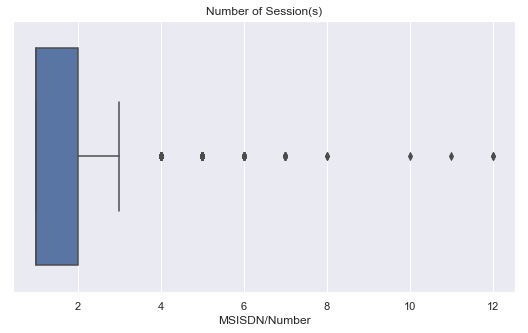

In [54]:
sns.boxplot(number_session.sample(10000))

plt.title('Number of Session(s)')

Most of the users have only one sessions or around it while some few outliers had over one thousand sessions

Text(0.5, 1.0, 'Session Duration')

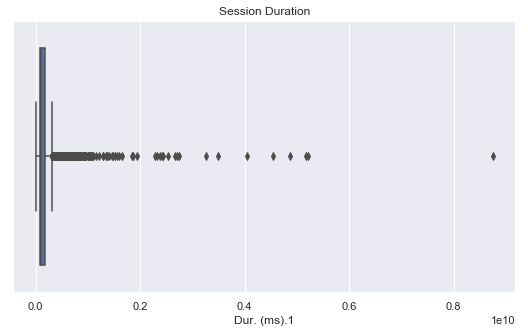

In [55]:
sns.boxplot(session_duration.sample(10000))

plt.title('Session Duration')

Just like the number of of sessions, the aggregated sessions has some outliers corresponding to the same outliers that was seen in the number of sessions.

Text(0.5, 1.0, 'Total Download')

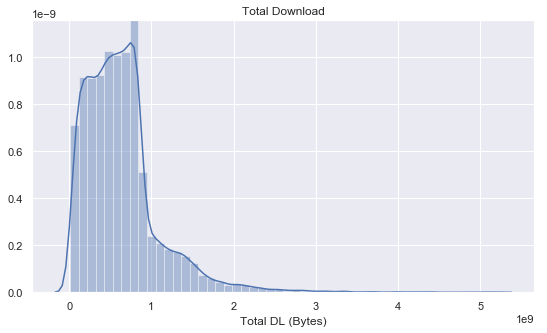

In [56]:
sns.distplot(total_download.sample(10000))

plt.title('Total Download')

The skewness of the plot is positive indicating that the majority has lower downloads and the minority has some users with outlying data use.

Text(0.5, 1.0, 'Total Upload')

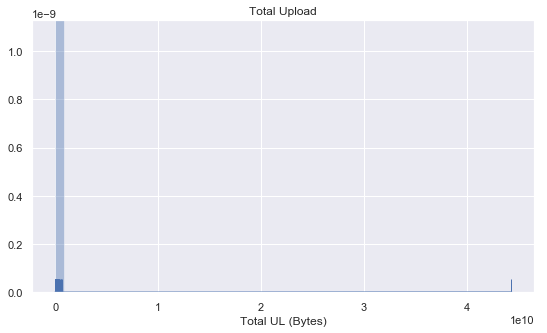

In [57]:
sns.distplot(total_upload.sample(10000), kde=True, rug=True)

plt.title('Total Upload')

Similar to the download plot, the upload plot also has a positive skew albeit tending towards a neutral leaning.

#### Bivariate Graphical Analysis

Here, I will plot the applications data against the total data used (UL + DL) in a bivariate analysis. But to start with, I will compute UL+DL.

In this analysis, I will be sampling only 1000 data for the scatter plots to enhance making insights after test running with 100 data points. 

In [58]:
df['total_data'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
total_data = df.groupby('MSISDN/Number')['total_data'].sum()

Text(0.5, 1.0, 'Social Media 100')

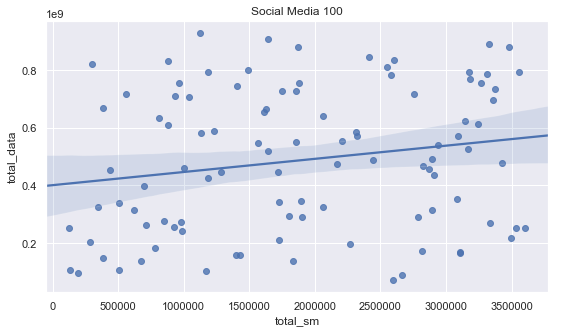

In [59]:
#visualizing 100 data points for Social Media

sns.regplot(x='total_sm', y='total_data', data=df.sample(100))
plt.title('Social Media 100')

Text(0.5, 1.0, 'Social Media 1000')

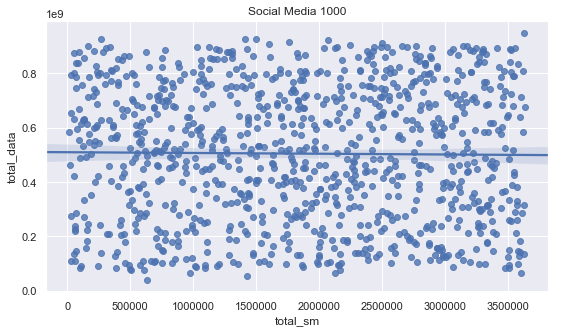

In [60]:
#visualizing 1000 data points for Social Media

sns.regplot(x='total_sm', y='total_data', data=df.sample(1000))

plt.title('Social Media 1000')

There is a no positive correlation between Social Media data and Total data as the data points are scattered. They clustered that is seen in in the 1000 data points is due to the high number and hence a facade.

Text(0.5, 1.0, 'Youtube Correlation')

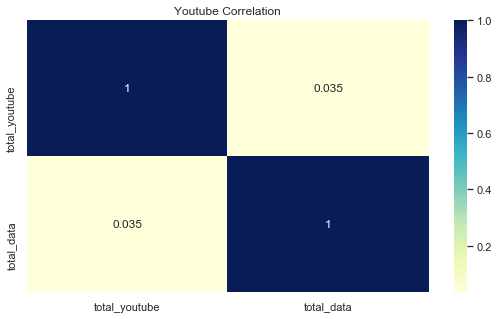

In [61]:
#visualizing relationship between Youtube data usage and total

sns.heatmap(df[['total_youtube', 'total_data']].corr(), cmap="YlGnBu", annot=True)
plt.title('Youtube Correlation')

With a correlation of 0.035, the correlation between the two columns is very low. Hence, the relationship between the total_data and youtube_data is weak.

Text(0.5, 1.0, 'Netflix 100')

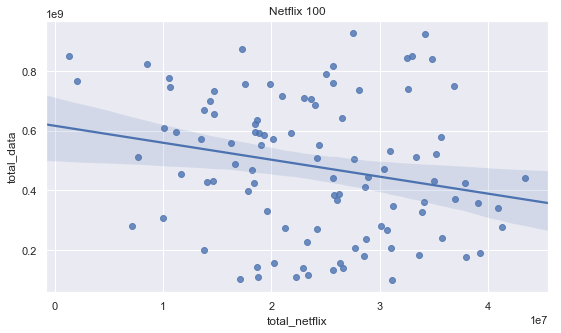

In [62]:
#visualizing 100 data points for Netflix

sns.regplot(x='total_netflix', y='total_data', data=df.sample(100))
plt.title('Netflix 100')

Text(0.5, 1.0, 'Netflix 1000')

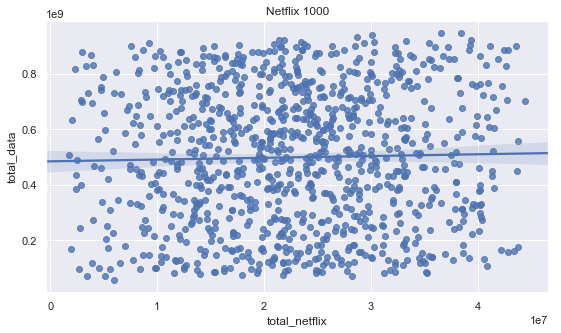

In [63]:
#visualizing 1000 data points for Netflix

sns.regplot(x='total_netflix', y='total_data', data=df.sample(1000))
plt.title('Netflix 1000')

Compared with the scatter plot for Social Media, the Netflix chart is more clustered supporting the notion that netflix users will use more data than is required for social media like Twitter, Facebook etc. 

Text(0.5, 1.0, 'Google Correlation')

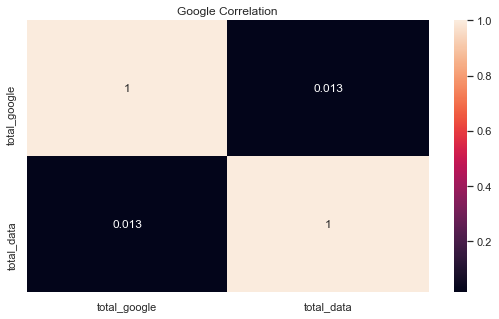

In [64]:
#visualizing relationship between Google data usage and total

sns.heatmap(df[['total_google', 'total_data']].corr(), annot=True)
plt.title('Google Correlation')

The correlation value for Google applications is even more lower than was seen for Youtube. This is because Google applications are mostly low weight (in terms of data requirement) and youtube is a video based platform.

Text(0.5, 1.0, 'Email 100')

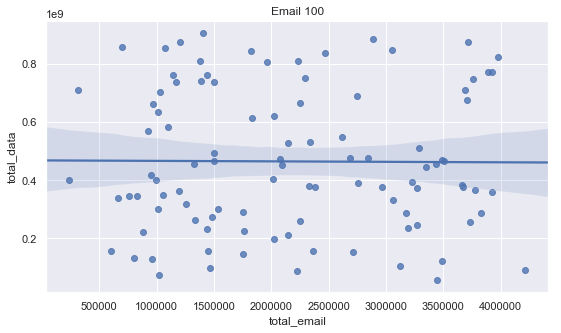

In [65]:
#visualizing 100 data points for Email

sns.regplot(x='total_email', y='total_data', data=df.sample(100))
plt.title('Email 100')

Text(0.5, 1.0, 'Email 1000')

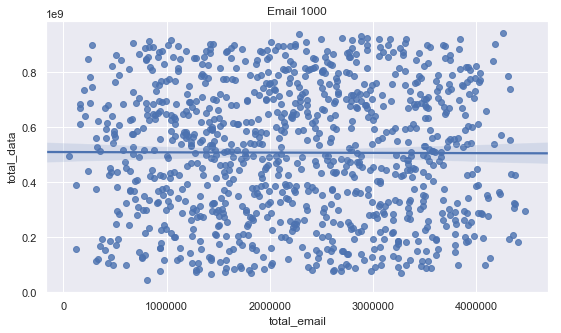

In [66]:
#visualizing 1000 data points for Email

sns.regplot(x='total_email', y='total_data', data=df.sample(1000))
plt.title('Email 1000')

Expectedly, the Email applications have very little correlation with the Total data since they contribute so little to the overall data that is being used by users.

Text(0.5, 1.0, 'Gaming Correlation')

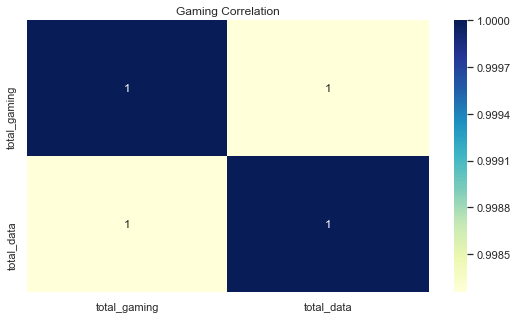

In [67]:
#visualizing relationship between Gaming data usage and total

sns.heatmap(df[['total_gaming', 'total_data']].corr(), cmap="YlGnBu", annot=True)
plt.title('Gaming Correlation')

Text(0.5, 1.0, 'Gaming 1000')

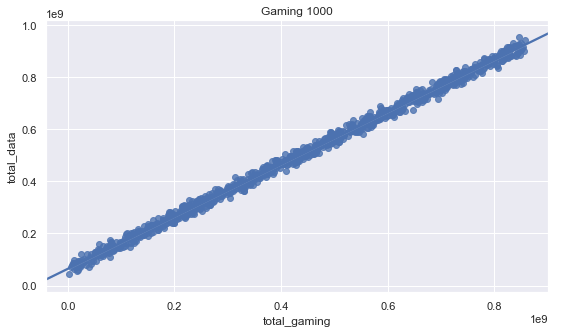

In [68]:
#To confirm the perfect correlation of Gaming apps

sns.regplot(x='total_gaming', y='total_data', data=df.sample(1000))
plt.title('Gaming 1000')

The gaming data has a perfect correlation with the total data the users use. This implies that the majority of the data usage is on the gaming apps and this makes perfect sense as video games are more data consuming. 

Text(0.5, 1.0, 'Other Correlation')

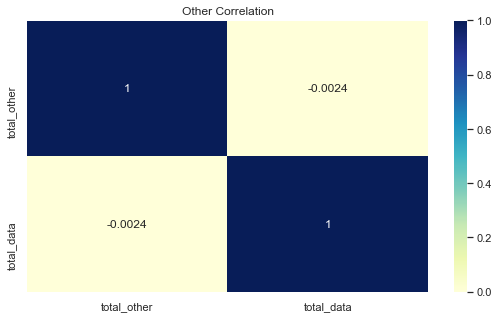

In [69]:
#visualizing relationship between Other data usage and total

sns.heatmap(df[['total_other', 'total_data']].corr(), cmap="YlGnBu", annot=True)
plt.title('Other Correlation')

The correlation for Other apps is the lowest and there is so little comments that can be said here since I do not know the sets of apps that make up this category. But definitely, they contribute little to the total_data usage.

#### Variable Transformation

Grouping the users into five decile groups based on the total duration of sessions. 

In [70]:
decile_5 = pd.qcut(session_duration,5,labels=False)

In [71]:
# decile_data = {}

# for i in decile_5:
#     for r in total_data
#     if i==0:
#         decile_data[decile_5.index[i]]=
# len(total_data)

data_join_decile = pd.concat([total_data, decile_5], axis=1)
data_join_decile.columns=['total_data', 'decile_5']
data_decile = data_join_decile.groupby('decile_5')['total_data'].sum()
data_decile      #total data used per decile group

decile_5
0    1.154869e+13
1    1.184993e+13
2    1.229069e+13
3    1.397434e+13
4    2.470154e+13
Name: total_data, dtype: float64

The 5th decile group used the most data as it is expected while the other follow reverse chronologically. The reason for this is because the users with the most duration of session will end up using the most amount of data. 

#### Computing a Correlation Matrix for the Application Data

In the next couple of cell(s), I will put up a correlation matrix of all the applications and present an understanding of their dependence of one another. 

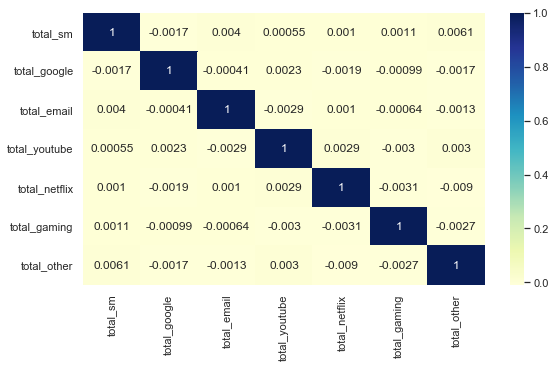

In [72]:
app_columns = ['total_sm', 'total_google', 'total_email', 'total_youtube', 'total_netflix', 'total_gaming', 'total_other']
sns.heatmap(df[app_columns].corr(), cmap="YlGnBu", annot=True)

Given the very low correlation values across all the application usage, there is no significant relationship between all the variables.

#### Dimentionality Reduction

In [73]:
from sklearn.preprocessing import StandardScaler
#getting my data ready

my_data = pd.concat([ session_duration, number_session, total_data,total_sm, total_youtube, total_netflix, total_google, total_email, total_gaming, total_other], axis=1)
# x = StandardScaler().fit_transform(df)
my_data.head()

,Dur. (ms).1,MSISDN/Number,total_data,total_sm,total_youtube,total_netflix,total_google,total_email,total_gaming,total_other
MSISDN/Number,,,,,,,,,,
3.360100e+10,116720140.0,1,8.786906e+08,2232135.0,21624548.0,27180981.0,4389005.0,1331362.0,8.124587e+08,386570872.0
3.360100e+10,181230963.0,1,1.568596e+08,2660565.0,12432223.0,11221763.0,5334863.0,3307781.0,1.197501e+08,281710071.0
3.360100e+10,134969374.0,1,5.959665e+08,3195623.0,21333570.0,19353900.0,3443126.0,3205380.0,5.388277e+08,501693672.0
3.360101e+10,49878024.0,1,4.223207e+08,280294.0,6977321.0,1942092.0,9678493.0,2284670.0,3.911261e+08,35279702.0
3.360101e+10,37104453.0,2,1.457411e+09,2912542.0,41533002.0,49201724.0,18499616.0,3305469.0,1.314798e+09,804804484.0


In [74]:
x = StandardScaler().fit_transform(my_data)
x = pd.DataFrame(x, columns=my_data.columns)

C:\Users\OWNER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\OWNER\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [75]:
x.head()

,Dur. (ms).1,MSISDN/Number,total_data,total_sm,total_youtube,total_netflix,total_google,total_email,total_gaming,total_other
0,-0.104073,-0.120344,0.107686,-0.052851,-0.131362,-0.059459,-0.249779,-0.240150,0.140824,-0.149168
1,0.118790,-0.120344,-0.317634,0.014885,-0.250198,-0.266464,-0.213822,0.017824,-0.327319,-0.221533
2,-0.041028,-0.120344,-0.058902,0.099480,-0.135124,-0.160983,-0.285737,0.004458,-0.044100,-0.069721
3,-0.334989,-0.120344,-0.161218,-0.361442,-0.320717,-0.386829,-0.048699,-0.115719,-0.143919,-0.391595
4,-0.379117,0.177718,0.448681,0.054724,0.126007,0.226169,0.286638,0.017522,0.480312,0.139457


In [76]:
#getting principal components

from sklearn.decomposition import PCA
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)
pca.shape

(106857, 2)

Text(0.5, 1.0, 'Dimentionality Reduction')

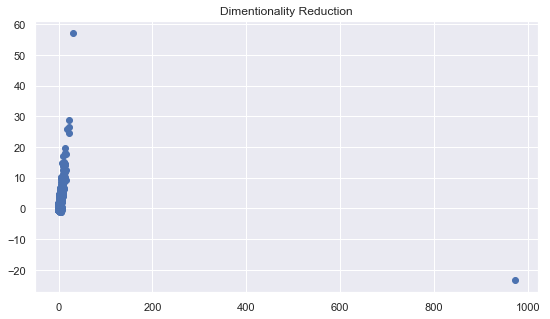

In [77]:
plt.scatter(pca[:, 0], pca[:, 1])

plt.title('Dimentionality Reduction')

When the dataset is reduced to two components, there is a strong correlation between the two section. This implies that there is the users are dependents on one another to a significant amount. And this makes perfect sense since no single user can use social media applications alone, they have to have other to chat with. Similarly with gaming apps, they have to play with others also using data

## User Engagement Analysis

As telecom brands are the data providers of all online activities, meeting user requirements, and creating an engaging user experience is a prerequisite for them. Building & improving the QoS (Quality of Service) to leverage the mobile platforms and to get more users for the business is good but the success of the business would be determined by the user engagement and activity of the customers on available apps.<br />

Therefore, if we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to concentrate network resources for different clusters of customers based on the engagement scores. <br />

In this section, I will be tracking the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))

In [78]:
#aggregating top ten users across the session frequency
 
sorted(number_session.items(), key=lambda x: x[1], reverse=True)[:10]

[(41882819545.02736, 1066),
 (33626320676.0, 18),
 (33614892860.0, 17),
 (33625779332.0, 17),
 (33659725664.0, 16),
 (33675877202.0, 15),
 (33760536639.0, 15),
 (33667163239.0, 13),
 (33603127838.0, 12),
 (33604515716.0, 12)]

In [79]:
#aggregating top ten users across the duration of session in ms

sorted(session_duration.items(), key=lambda x: x[1], reverse=True)[:10]

[(41882819545.02736, 72551547092.54602),
 (33625779332.0, 18553763486.0),
 (33614892860.0, 9966905758.0),
 (33760536639.0, 9279442000.0),
 (33626320676.0, 8791936680.0),
 (33667163239.0, 8744922020.0),
 (33662840755.0, 6614274287.0),
 (33664693736.0, 6288735771.0),
 (33603127838.0, 6287767483.0),
 (33667456716.0, 5649885358.0)]

In [80]:
#aggregating top ten users across the session total traffic 

sorted(total_data.items(), key=lambda x: x[1], reverse=True)[:10]

[(41882819545.02736, 531744709244.3711),
 (33614892860.0, 8846226494.0),
 (33760536639.0, 8514773963.0),
 (33625779332.0, 8499620722.0),
 (33626320676.0, 7971167261.0),
 (33675877202.0, 7891110608.0),
 (33659725664.0, 7705862783.0),
 (33666464084.0, 7308500938.0),
 (33760413819.0, 7132370514.0),
 (33664712899.0, 6872018208.0)]

The information above gave the top ten recorded values for TellCo in terms of number of sessions, sessions durations and total data usage by users. It gives a good insights into their business performance on the customer side when compared with competitors. 

#### Normalizing Dataset

In [81]:
#the engagement metrics as a dataframe
new_df = pd.concat([total_data, session_duration, number_session], axis=1)
new_df.head(10)

,total_data,Dur. (ms).1,MSISDN/Number
MSISDN/Number,,,
3.360100e+10,8.786906e+08,116720140.0,1
3.360100e+10,1.568596e+08,181230963.0,1
3.360100e+10,5.959665e+08,134969374.0,1
3.360101e+10,4.223207e+08,49878024.0,1
3.360101e+10,1.457411e+09,37104453.0,2
3.360101e+10,6.152172e+08,253983077.0,2
3.360101e+10,6.547231e+08,128360523.0,2
3.360101e+10,3.326604e+08,86399977.0,1
3.360101e+10,9.901322e+08,495702147.0,2


In [82]:
df_norm = new_df.values.astype(float)    #ensuring it is in float format

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
df_norm_scaled = min_max_scaler.fit_transform(df_norm)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_norm_scaled)

In [83]:
df_normalized.head(10)

,0,1,2
0,0.001590,0.001510,0.000000
1,0.000232,0.002400,0.000000
2,0.001058,0.001762,0.000000
3,0.000732,0.000589,0.000000
4,0.002678,0.000413,0.000939
5,0.001095,0.003403,0.000939
6,0.001169,0.001671,0.000939
7,0.000563,0.001093,0.000000
8,0.001800,0.006735,0.000939
9,0.001315,0.001623,0.000000


#### KMeans Clustering 

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df_normalized)

In [85]:
centroids = kmeans.cluster_centers_
centroids

array([[1.09847344e-03, 1.49588977e-03, 2.34219079e-04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.04399524e-03, 7.40298424e-03, 2.13813445e-03]])

In [86]:
pred_y = kmeans.fit_predict(df_normalized)

In [87]:
df_normalized.columns = ['0', '1', '2']

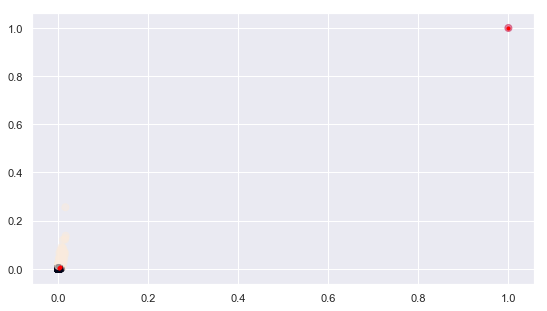

In [88]:
plt.scatter(df_normalized['0'], df_normalized['1'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)
plt.show()

In [89]:
#mean of K-cluster

The clustering of the datapoints around the centeroids shows that while there is a significant difference between the two centers, the datapoints correlates strongly with their corresponding centeroids.

#### Aggregating User Total Traffic per Application

In [90]:
#function to return the top 10 users

def aggregate_data(app):
    return sorted(app.items(), key=lambda x: x[1], reverse=True)[:10]

In [91]:
#top 10 users for social media
aggregate_data(total_sm)

[(41882819545.02736, 1973817362.2080266),
 (33626320676.0, 43374779.0),
 (33760536639.0, 39783189.0),
 (33659725664.0, 35412358.0),
 (33614892860.0, 28294544.0),
 (33625779332.0, 27135500.0),
 (33667163239.0, 24247850.0),
 (33786323068.0, 23974919.0),
 (33669068942.0, 23800834.0),
 (33603127838.0, 23077825.0)]

In [92]:
#top 10 users for youtube
aggregate_data(total_youtube)

[(41882819545.02736, 24340725905.6386),
 (33625779332.0, 452958769.0),
 (33760536639.0, 396289198.0),
 (33614892860.0, 394370218.0),
 (33626320676.0, 374483047.0),
 (33675877202.0, 317410572.0),
 (33667163239.0, 315231310.0),
 (33627080969.0, 308790774.0),
 (33760413819.0, 303169107.0),
 (33698792269.0, 302661958.0)]

In [93]:
#top 10 users for netflix
aggregate_data(total_netflix)

[(41882819545.02736, 24253572125.53838),
 (33659725664.0, 399519079.0),
 (33614892860.0, 361401046.0),
 (33625779332.0, 356980607.0),
 (33760536639.0, 334643269.0),
 (33626320676.0, 328725740.0),
 (33760413819.0, 318347546.0),
 (33667163239.0, 313939488.0),
 (33675877202.0, 309093159.0),
 (33786323068.0, 305939790.0)]

In [94]:
#top 10 users for google
aggregate_data(total_google)

[(41882819545.02736, 8248576910.545573),
 (33626320676.0, 152191852.0),
 (33625779332.0, 142307915.0),
 (33614892860.0, 127973787.0),
 (33760536639.0, 123223099.0),
 (33659725664.0, 116516345.0),
 (33786323068.0, 110254484.0),
 (33675877202.0, 109860502.0),
 (33667163239.0, 105032696.0),
 (33761268199.0, 97089988.0)]

In [95]:
#top 10 users for email
aggregate_data(total_email)

[(41882819545.02736, 2399880433.30996),
 (33626320676.0, 42418782.0),
 (33614892860.0, 40788634.0),
 (33625779332.0, 40633966.0),
 (33786323068.0, 36310123.0),
 (33659725664.0, 35999792.0),
 (33760536639.0, 33693767.0),
 (33675877202.0, 31514421.0),
 (33665460546.0, 30417885.0),
 (33667163239.0, 30335796.0)]

In [96]:
#top 10 users for gaming
aggregate_data(total_gaming)

[(41882819545.02736, 461478029804.7061),
 (33614892860.0, 7749432234.0),
 (33760536639.0, 7461045228.0),
 (33625779332.0, 7326673487.0),
 (33675877202.0, 6970567597.0),
 (33626320676.0, 6887572116.0),
 (33659725664.0, 6725559211.0),
 (33666464084.0, 6646303338.0),
 (33760413819.0, 6268619592.0),
 (33664712899.0, 6103856008.0)]

In [97]:
#top 10 users for other
aggregate_data(total_other)

[(41882819545.02736, 450978392359.6189),
 (33626320676.0, 8167877776.0),
 (33614892860.0, 7639263572.0),
 (33675877202.0, 6798515150.0),
 (33625779332.0, 6354583086.0),
 (33603127838.0, 6326670874.0),
 (33659725664.0, 6317415487.0),
 (33626948251.0, 5305447882.0),
 (33627080969.0, 5117790890.0),
 (33761268199.0, 5077779438.0)]

The information above gave the top ten recorded values for TellCo in terms of the data used by several application used by users. It gives a good insights into their business performance on the customer side when compared with competitors. 

#### Three Most used Applications

Here, I will be presenting the scatter plot and bar plot of the three most applications. I will get the three applications by finding the the sum of data all users used across the time the dataset was taken for each application, then sort the values.

In [98]:
apps_data = {'Social Media':total_sm.sum(), 'Youtube': total_youtube.sum(), 'Netflix': total_netflix.sum(), 
             'Google': total_google.sum(), 'Email': total_email.sum(), 'Gaming': total_gaming.sum(), 
             'Other': total_other.sum()}

In [99]:
#sorting through the dict and selecting the top three
top_3_app = sorted(apps_data.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_app

[('Gaming', 64550395439016.7),
 ('Other', 64405230908181.62),
 ('Youtube', 3396545039272.6387)]

In [100]:
#splitting the tuple into list to plot
x = []
y = []
for i in top_3_app:
    j, k = i
    x.append(j)
    y.append(k)

In [101]:
#to convert the data used to gigagbytes

y = [i/1e+9 for i in y]

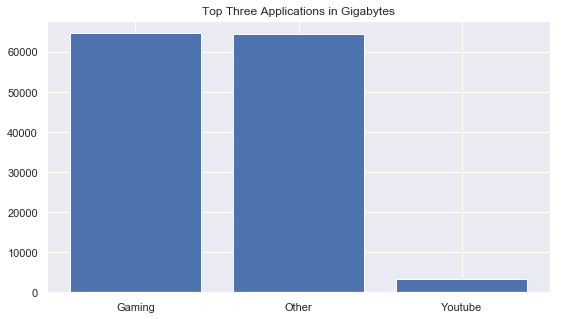

In [102]:
plt.bar(x, y)
plt.title('Top Three Applications in Gigabytes')
plt.show()

In [103]:
#the scatter plot for the three apps
top_3_df = pd.concat([total_gaming, total_other, total_youtube], axis=1)
top_3_df.head()

,total_gaming,total_other,total_youtube
MSISDN/Number,,,
3.360100e+10,8.124587e+08,386570872.0,21624548.0
3.360100e+10,1.197501e+08,281710071.0,12432223.0
3.360100e+10,5.388277e+08,501693672.0,21333570.0
3.360101e+10,3.911261e+08,35279702.0,6977321.0
3.360101e+10,1.314798e+09,804804484.0,41533002.0


In [104]:
#converting to gigabytes
new_top_3 = top_3_df.apply(func=lambda x : x / 1e+9, axis=1)
values_new_top_3 = new_top_3.values

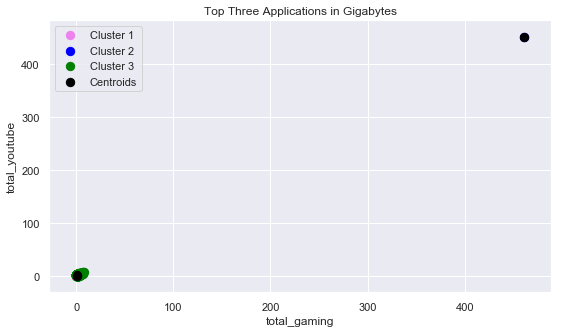

In [105]:

# ax = sns.scatterplot(x="total_gaming", y="total_youtube", hue='total_other', size="total_other", palette="Set2",
#                       data=new_top_3)


kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(values_new_top_3)
# Visualising the clusters
plt.scatter(values_new_top_3[Y_kmeans==0, 0], values_new_top_3[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(values_new_top_3[Y_kmeans==1, 0], values_new_top_3[Y_kmeans==1, 1], s=70, c='blue', label= 'Cluster 2')
plt.scatter(values_new_top_3[Y_kmeans==2, 0], values_new_top_3[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Top Three Applications in Gigabytes')

plt.xlabel('total_gaming')
plt.ylabel('total_youtube')
plt.legend()
plt.show()

The three top applications are Gaming, Youtube and Other in that other which further prove that video games uses the most data. Youtube being a video based platform also uses a lot of data and Others covers a wide range of other applications.

#### K-means Clustering Algorithm

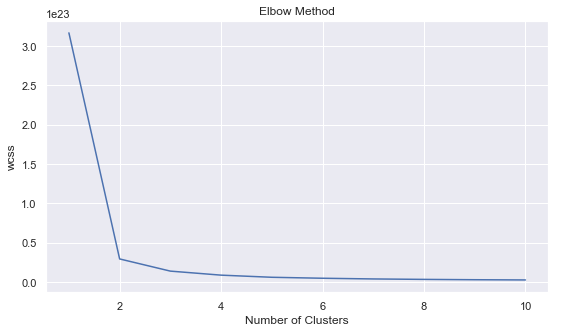

In [106]:
# Determining the optimized k-value using the elbow method

new_df_values = new_df.values
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(new_df_values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

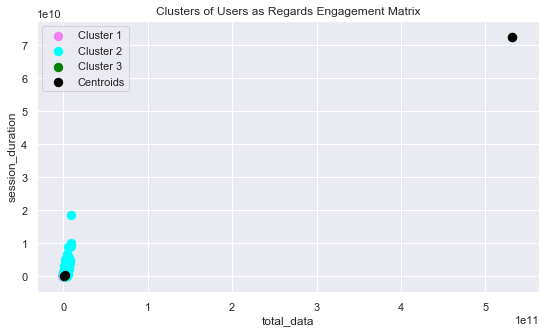

In [107]:
#chooosing k = 3


# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(new_df_values)
# Visualising the clusters
plt.scatter(new_df_values[Y_kmeans==0, 0], new_df_values[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(new_df_values[Y_kmeans==1, 0], new_df_values[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(new_df_values[Y_kmeans==2, 0], new_df_values[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of Users as Regards Engagement Matrix')
plt.xlabel('total_data')
plt.ylabel('session_duration')
plt.legend()
plt.show()

Cluster 1 and 2 overlaps which signifies that session duration and session frequency are dependent on each other. This is highly probable because the higher the number of sessions, the higher the cumulative duration of the particular user. Cluster three which represents data usage is a lot more separated from the other two, this is because, it is possible to have short sessions with high data usage (if the user uses more of video games or youtube for instance).

## Experience Analytics
The Telecommunication industry has experienced a great revolution since the last decade. Mobile devices have become the new fashion trend and play a vital role in everyone's life. The success of the mobile industry is by and large dependent on its consumers. Therefore, it is necessary for the vendors to focus on their target audience i.e. what are the needs and requirements of their consumers and how they feel and perceive their products. In the telecommunication industry, the user experience is related, most of the time, to network parameter performances or the customers’ device characteristics.<br />

In this section, I will be focusing on network parameters like [TCP retransmission](https://www.saminiir.com/lets-code-tcp-ip-stack-5-tcp-retransmission/#tcp-retransmission), [Round Trip Time (RTT)](http://www.on-time.com/rtos-32-docs/rtip-32/programming-manual/tcp-ip-networking/tcp/round-trip-time-rtt.htm), [Throughput](https://blog.thousandeyes.com/a-very-simple-model-for-tcp-throughput/#:~:text=A%20Simple%20Model%20for%20TCP%20Throughput&text=Where%20WindowSize%20is%20the%20amount,%2Dto%2Dend%20network%20path.), and the customers’ device characteristics like the handset type to conduct a deep user experience analysis. The network parameters are all columns in the dataset.

#### Calculating Average TCP Transmission Per User

In [108]:
#calculating total TCP for each session

df['TCP'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

In [109]:
#aggregating the average TCP of each user

average_tcp = df.groupby('MSISDN/Number')['TCP'].mean()
average_tcp.head(10)

MSISDN/Number
3.360100e+10    2.156957e+07
3.360100e+10    2.156957e+07
3.360100e+10    2.156957e+07
3.360101e+10    7.607247e+05
3.360101e+10    1.547020e+07
3.360101e+10    1.116600e+07
3.360101e+10    1.083990e+07
3.360101e+10    7.599367e+05
3.360101e+10    2.156957e+07
3.360102e+10    2.081121e+07
Name: TCP, dtype: float64

In [110]:
#calculating total average RTT for each session
df['total_rrt'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']

In [111]:
#aggregating the average RTT of each user

average_rrt = df.groupby('MSISDN/Number')['total_rrt'].sum()
average_rrt.head(10)

MSISDN/Number
3.360100e+10     46.000000
3.360100e+10     31.000000
3.360100e+10    127.458589
3.360101e+10     84.000000
3.360101e+10    119.000000
3.360101e+10    151.458589
3.360101e+10     53.000000
3.360101e+10     52.000000
3.360101e+10    254.917178
3.360102e+10     62.000000
Name: total_rrt, dtype: float64

In [112]:
#replacing NaN in handset type with Huawei B528S-23A (mode)

df['Handset Type'] = df['Handset Type'].fillna('Huawei B528S-23A')

In [113]:
#aggregating over handset type

handset_type = df.groupby('MSISDN/Number')['Handset Type'].count()
handset_type.head(10)

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
3.360101e+10    2
3.360101e+10    2
3.360101e+10    1
3.360101e+10    2
3.360102e+10    1
Name: Handset Type, dtype: int64

In [114]:
#calculating total average throughput for each session
df['total_throughput'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

In [115]:
#aggregating the average throughput of each user

average_throughput = df.groupby('MSISDN/Number')['total_throughput'].sum()
average_throughput.head(10)

MSISDN/Number
3.360100e+10       76.0
3.360100e+10       99.0
3.360100e+10       97.0
3.360101e+10      248.0
3.360101e+10    56844.0
3.360101e+10     7908.0
3.360101e+10    42513.0
3.360101e+10     1247.0
3.360101e+10      189.0
3.360102e+10      146.0
Name: total_throughput, dtype: float64

#### Top 10 of Experience Analytics Parameters 

In [116]:
# For Average TCP

sorted(average_tcp.items(), key=lambda x: x[1], reverse=True)[:10]

[(33698575965.0, 4301477439.0),
 (33658706088.0, 4288120860.0),
 (33664907178.0, 4268647350.0),
 (33658633234.0, 4254659643.0),
 (33666125485.0, 4211257819.0),
 (33668768421.0, 4166594973.0),
 (33661305358.0, 4137937737.0),
 (33662396708.0, 4117804973.0),
 (33666824231.0, 3968120596.0),
 (33762643398.0, 3786870933.0)]

In [117]:
# For Average RRT

sorted(average_rrt.items(), key=lambda x: x[1], reverse=True)[:10]

[(41882819545.02736, 329526.1647242831),
 (33662317023.0, 96924.0),
 (33660874265.0, 64670.0),
 (33683692867.0, 54848.0),
 (33698551167.0, 46021.0),
 (33761813523.0, 37084.0),
 (33668791629.0, 36304.0),
 (33760941100.0, 27278.0),
 (33606788933.0, 26300.0),
 (33671816754.0, 25715.0)]

In [118]:
# For Average throughput

sorted(average_throughput.items(), key=lambda x: x[1], reverse=True)[:10]

[(41882819545.02736, 18078233.474573333),
 (33762333464.0, 902222.0),
 (33668708263.0, 840424.0),
 (33659546392.0, 798342.0),
 (33669946573.0, 690815.0),
 (33668425947.0, 676858.0),
 (33698174760.0, 618797.0),
 (33625700673.0, 564179.0),
 (33658075438.0, 550352.0),
 (33762644658.0, 549661.0)]

#### Bottom 10 of Experience Analytics Parameters 

In [119]:
# For Average TCP

sorted(average_tcp.items(), key=lambda x: x[1])[:10]

[(33650128412.0, 97.0),
 (33614777138.0, 128.0),
 (33762062356.0, 129.0),
 (33626357513.0, 134.0),
 (33607833304.0, 143.0),
 (33650681239.0, 176.0),
 (33769636458.0, 176.0),
 (33784203839.0, 177.0),
 (33679366089.0, 179.0),
 (33699694715.0, 182.0)]

In [120]:
# For Average RRT

sorted(average_rrt.items(), key=lambda x: x[1])[:10]

[(33652982188.0, 0.0),
 (33661575382.0, 0.0),
 (33660204450.0, 2.0),
 (33695045499.0, 4.0),
 (33659493541.0, 5.0),
 (33668619895.0, 6.0),
 (33647679481.0, 8.0),
 (33610846366.0, 9.0),
 (33672196893.0, 9.0),
 (33634684770.0, 10.0)]

In [121]:
# For Average throughput

sorted(average_throughput.items(), key=lambda x: x[1])[:10]

[(33603452974.0, 0.0),
 (33604131582.0, 0.0),
 (33608514832.0, 0.0),
 (33608752702.0, 0.0),
 (33608892887.0, 0.0),
 (33609847664.0, 0.0),
 (33610640063.0, 0.0),
 (33611523366.0, 0.0),
 (33616110252.0, 0.0),
 (33616605202.0, 0.0)]

#### Top 10 Most Frequent Experience Metric

In [122]:
# For Average TCP

pd.Series(average_tcp.value_counts().index[:10])

0    2.156957e+07
1    2.081121e+07
2    2.081124e+07
3    7.609887e+05
4    2.119039e+07
5    2.081123e+07
6    7.623187e+05
7    7.597507e+05
8    7.596967e+05
9    2.081257e+07
dtype: float64

In [123]:
# For Average RRT

pd.Series(average_rrt.value_counts().index[:10])

0    127.458589
1     29.000000
2     39.000000
3    254.917178
4     38.000000
5     30.000000
6     40.000000
7     28.000000
8     49.000000
9     31.000000
dtype: float64

In [124]:
# For Average throughput

pd.Series(average_throughput.value_counts().index[:10])

0    15.0
1    63.0
2    97.0
3    90.0
4    98.0
5    96.0
6    99.0
7    89.0
8    95.0
9    91.0
dtype: float64

#### Distribution Per Handset Type

In this subsection, I will be grouping the throughput and TCP values based on Handset Types and possible putting on a visual representation.

In [125]:
#For throughput value
throughput_handset = df.groupby('Handset Type')['total_throughput'].count()
len(throughput_handset)

1396

To visualize this result in a presentable manner, I will need to drop handsets that have less than hundred or hundred variations of throughput values to get the top handsets as regards number of throughput values. 

In [126]:
x = throughput_handset[throughput_handset > 100]

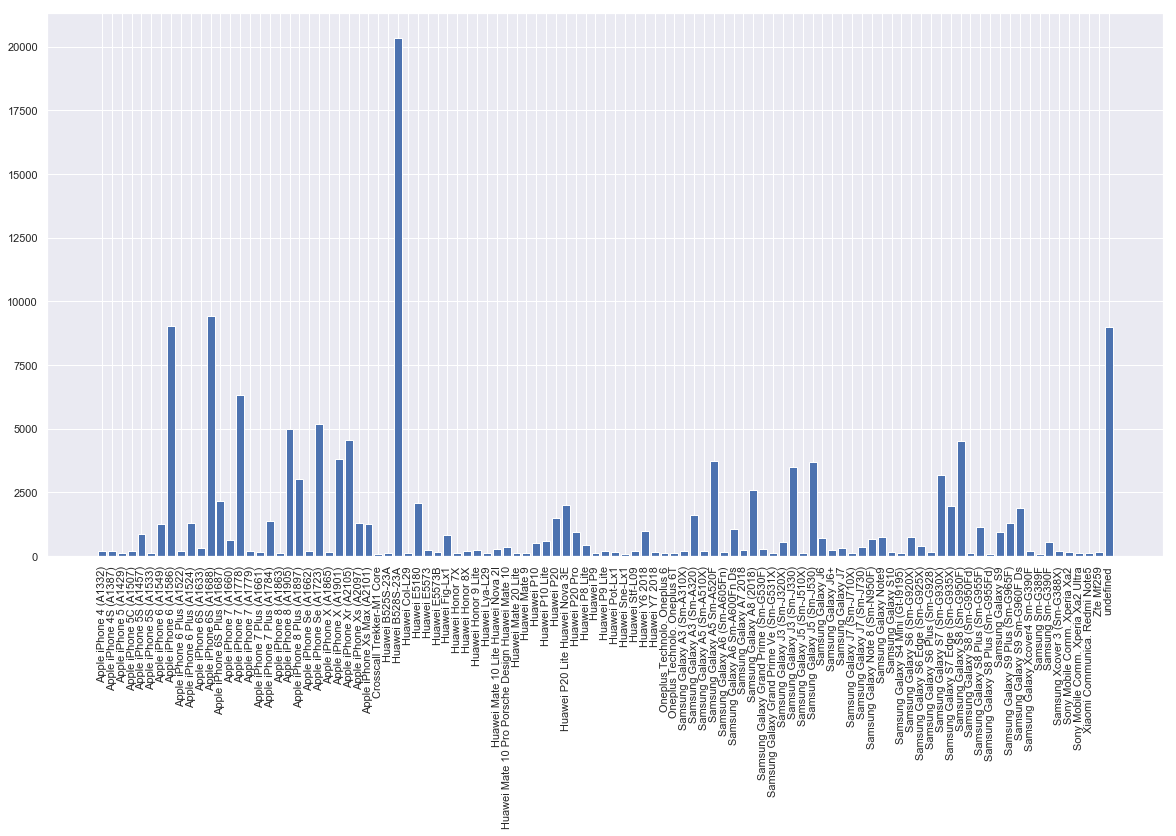

In [127]:
# plt.plot(kind='bar', x= throughput_handset.index, y=throughput_handset.values)

plt.figure(figsize=(20,10))          
plt.bar(x=x.index, height=x)
plt.xticks(rotation=90)
plt.show()

Throughput value is a measure of how succesfully data are being delivered over a network. Having taken the counts of the throughput values recorded per handset type, I noticed that certain brands have higher variablity. Such handset type includes:
* Huawei B528S-23A
* Apple iPhone 6S (A1688)
* Apple iPhone 6 (A1586)

It is no surprised that these top three handsets are made by two of the three top manufacturers I earlier on analysed. The rationale for this is that these handsets are used by so many (both privileged and the less privileged) that the rate of delivering data varies so widely depending on the strength of the network. This is the primary reason for the high number of throughput values for these handset types.

In [128]:
#TCP per user

tcp_handset = df.groupby('Handset Type')['TCP'].sum()
tcp_handset_25 = sorted(tcp_handset.items(), key=lambda x: x[1], reverse=True)[:25]

In [129]:
# splitting the tuple to be plotted
name = []
values = [] 
for i in tcp_handset_25:
    x,y = i
    name.append(x)
    values.append(y)    

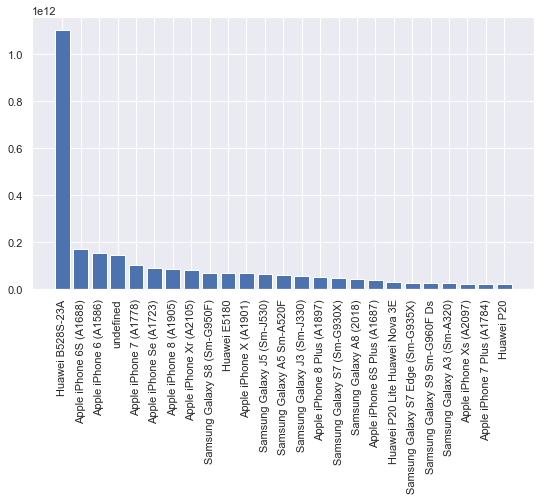

In [130]:
# plt.figure(figsize=(20,10))          
plt.bar(name, values)
plt.xticks(rotation=90)
plt.show()

Just as with throughput values count, TCP top performers are handsets from the three top manufacturers I earlier on analysed. TCP retransmission signifies how much the phone's network tries to reconnect when receiving data. Since these brands are the majority, they unsurprisingly have the highest number of reconnection per handset type.  

#### K-means Clustering of Experience Metrics

In [131]:
experience_metrics = pd.concat([average_tcp, average_rrt, handset_type], axis=1)
experience_metrics.head()

,TCP,total_rrt,Handset Type
MSISDN/Number,,,
3.360100e+10,2.156957e+07,46.000000,1
3.360100e+10,2.156957e+07,31.000000,1
3.360100e+10,2.156957e+07,127.458589,1
3.360101e+10,7.607247e+05,84.000000,1
3.360101e+10,1.547020e+07,119.000000,2


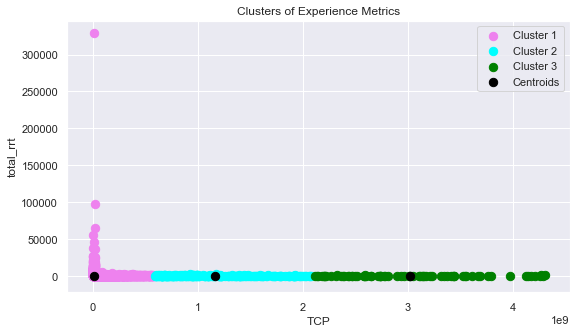

In [132]:
#chooosing k = 3
experience_metrics_values = experience_metrics.values

# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(experience_metrics_values)
# Visualising the clusters
plt.scatter(experience_metrics_values[Y_kmeans==0, 0], experience_metrics_values[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(experience_metrics_values[Y_kmeans==1, 0], experience_metrics_values[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(experience_metrics_values[Y_kmeans==2, 0], experience_metrics_values[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of Experience Metrics')
plt.xlabel('TCP')
plt.ylabel('total_rrt')
plt.legend()
plt.show()

The three clusters are well spread out which indicates that there are a wide variation in the experiences users get. This is likely to be due to the differences in device type, network strength in thier locations etc.

## Satisfaction Analysis

From here, I will continue in a later date due to the deadline I have with my client on this project. The final reccomendation I made can be found in this [presentation document](https://docs.google.com/presentation/d/1TcO7ExZ8ZXtfvbWOgcxjx6VECWdbmZZPfSyI3nPZfHc/edit?usp=sharing)  <br />

Cheers  <br />
Lawal Ogunfowora  <br />
Lawal1998@yahoo.com